#  **Lab Experiment 1**

In [5]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Display Image
def display_img(img):
  img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img_RGB);

## 1. Write a Python program for image translation
* a) Shift Down and Up
* b) Shift Up and Left

In [9]:
im1 = cv2.imread('dog_backpack.jpg', cv2.IMREAD_COLOR)

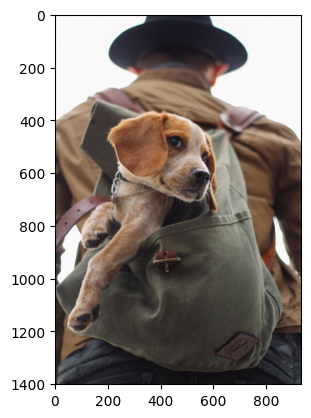

In [10]:
display_img(im1)

In [11]:
im1.shape[0]

1401

#### Shift Down

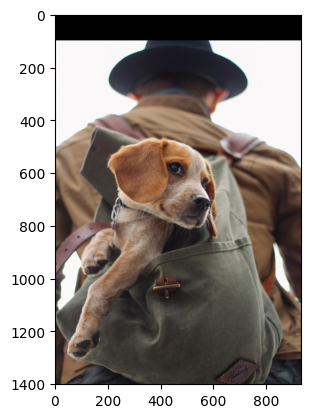

In [12]:
MDown = np.float32([[1, 0, 0], [0, 1, 100]]) #[1 0 right/left] [0 1 down/up]
shiftedDown = cv2.warpAffine(im1, MDown, (im1.shape[1], im1.shape[0]))
display_img(shiftedDown)

#### Shift Up

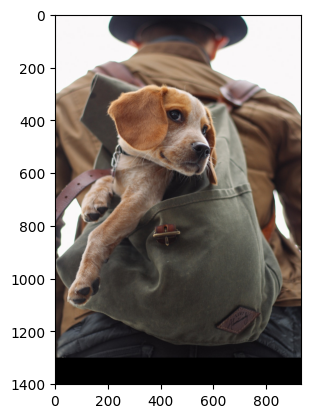

In [13]:
MUp = np.float32([[1, 0, 0], [0, 1, -100]]) #[1 0 right/left] [0 1 down/up]
shiftedUp = cv2.warpAffine(im1, MUp, (im1.shape[1], im1.shape[0]))
display_img(shiftedUp)

#### Right

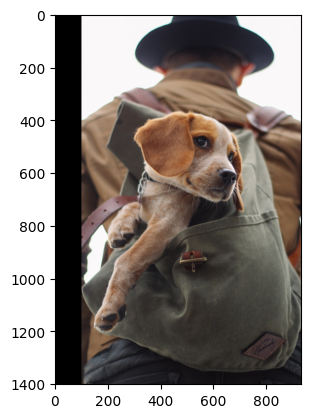

In [14]:
MLeft = np.float32([[1, 0, 100], [0, 1, 0]]) #[1 0 right/left] [0 1 down/up]
shiftedLeft = cv2.warpAffine(im1, MLeft, (im1.shape[1], im1.shape[0]))
display_img(shiftedLeft)

#### Left

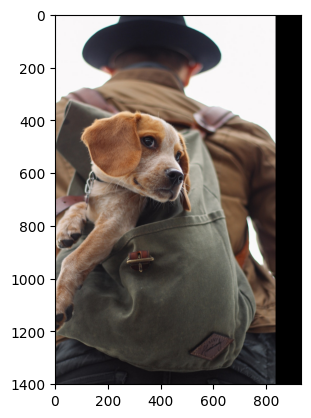

In [15]:
MRight = np.float32([[1, 0, -100], [0, 1, 0]]) #[1 0 right/left] [0 1 down/up]
shiftedRight = cv2.warpAffine(im1, MRight, (im1.shape[1], im1.shape[0]))
display_img(shiftedRight)

## 2. Write a python program for image rotation
* a) by 45 Degree
* b) by -90 Degree
* c) by 180 Degree

#### Rotate by 45

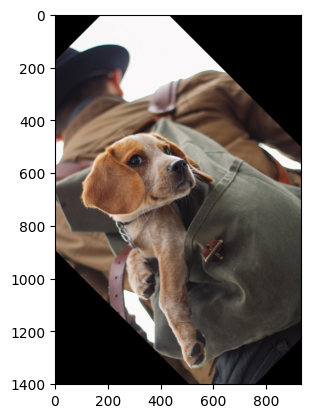

In [16]:
(h, w) = im1.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated45 = cv2.warpAffine(im1, M, (w, h))

display_img(rotated45)

#### Rotate By -90

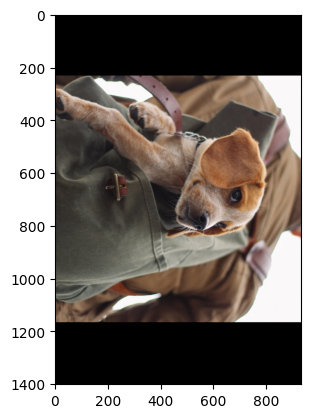

In [17]:
(h, w) = im1.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 270, 1.0)
rotated270 = cv2.warpAffine(im1, M, (w, h))

display_img(rotated270)

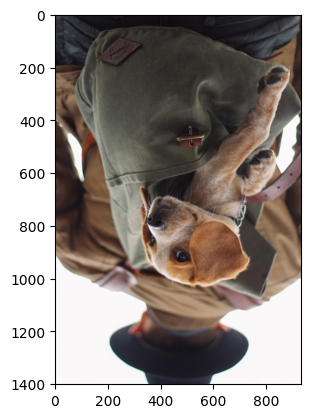

In [18]:
(h, w) = im1.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated45 = cv2.warpAffine(im1, M, (w, h))

display_img(rotated45)

## 3. Write a python program to resize image
* a) Width
* b) Height

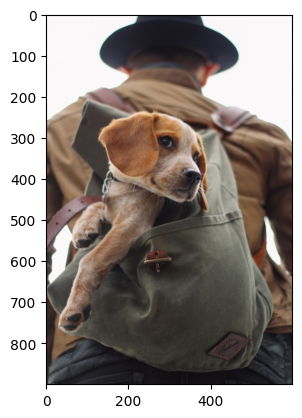

In [19]:
# Computing the aspect ratio
r = 600.0 / im1.shape[1]  #width of new image/old img width
dim = (600, int(im1.shape[0] * r))
resized = cv2.resize(im1, dim, interpolation = cv2.INTER_AREA)
display_img(resized)

## 4. Display a Grayscale Histogram of image

In [20]:
imGray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

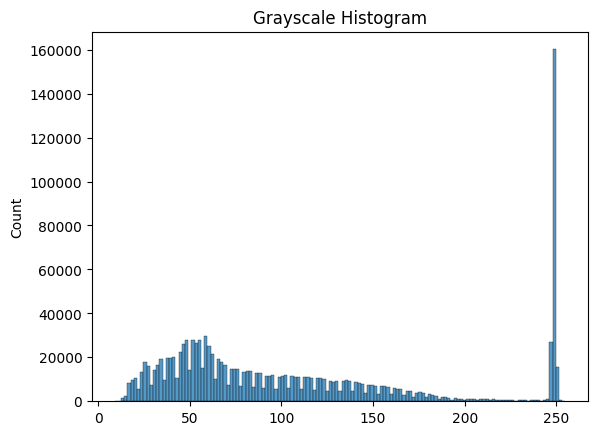

In [21]:
plt.title('Grayscale Histogram')
sns.histplot(imGray.ravel());

## 5. Display a colour Histogram of image

In [22]:
chans = cv2.split(im1)
colors = ("b", "g", "r")

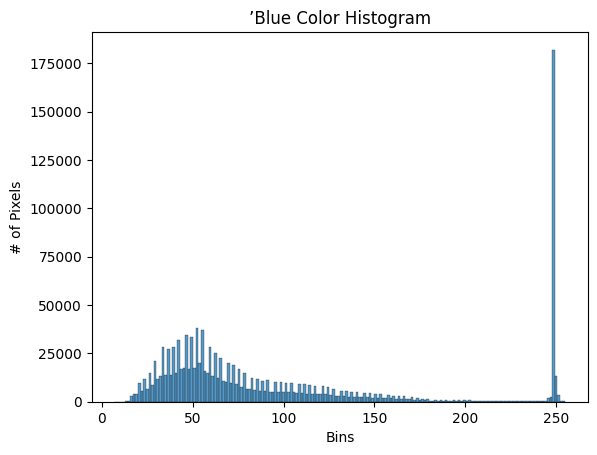

In [23]:
plt.title("’Blue Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
sns.histplot(chans[0].ravel());

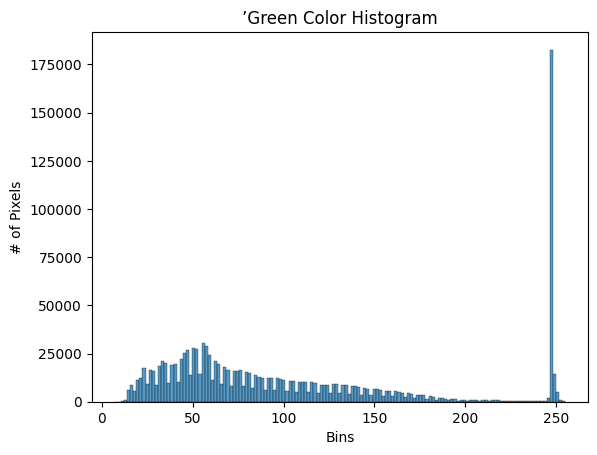

In [24]:
plt.title("’Green Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
sns.histplot(chans[1].ravel());

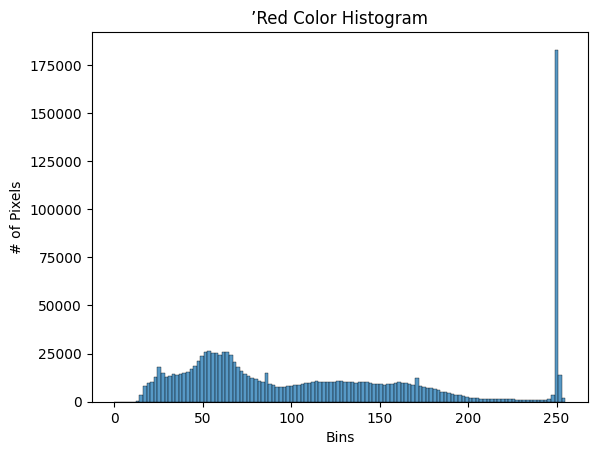

In [25]:
plt.title("’Red Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
sns.histplot(chans[2].ravel());

## 6. Write a python program of histogram equalization of image

Histogram equalization improves the contrast of an image
by “stretching” the distribution of pixels.

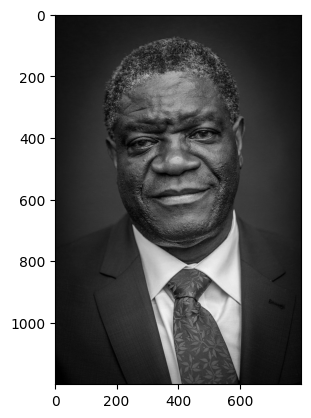

In [26]:
imGray2 = cv2.imread('Denis_Mukwege.jpg', cv2.IMREAD_GRAYSCALE)
display_img(imGray2)

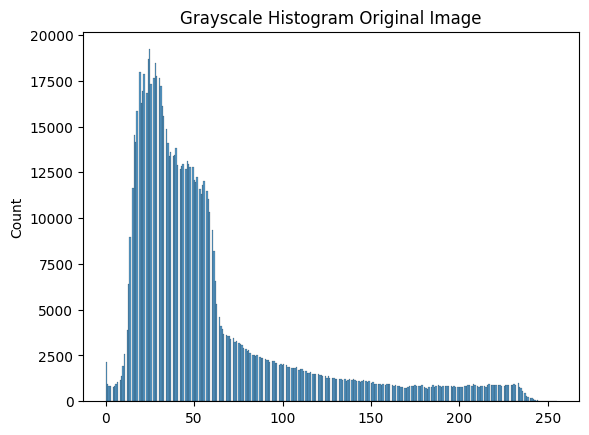

In [27]:
plt.title('Grayscale Histogram Original Image')
sns.histplot(imGray2.ravel());

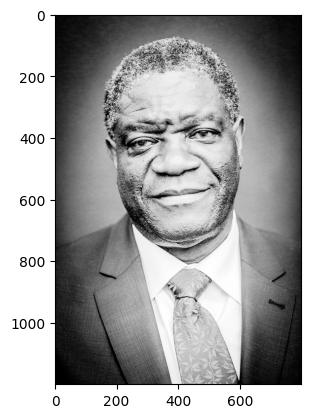

In [28]:
eq = cv2.equalizeHist(imGray2)
display_img(eq)

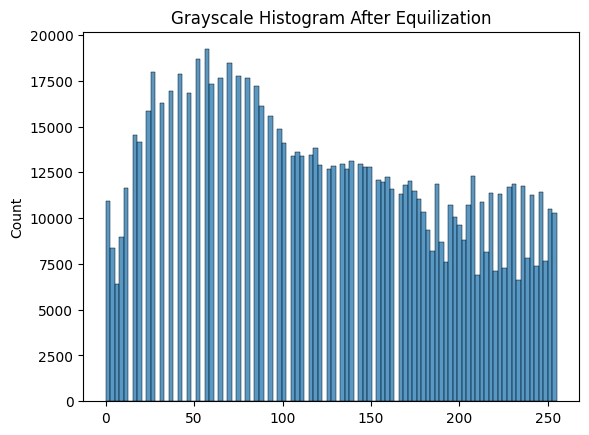

In [29]:
plt.title('Grayscale Histogram After Equilization')
sns.histplot(eq.ravel());

## 7. Apply Gaussian filter on image
* a) 3*3
* b) 5*5
* c) 7*7

In [30]:
blurred1 = cv2.GaussianBlur(imGray2, (3, 3), 0)
blurred2 = cv2.GaussianBlur(imGray2, (5, 5), 0)
blurred3 = cv2.GaussianBlur(imGray2, (7, 7), 0)

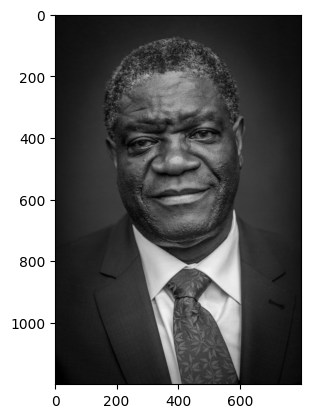

In [31]:
display_img(blurred1)

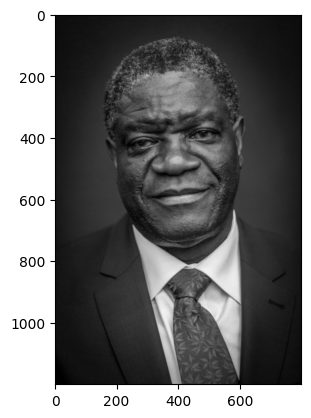

In [32]:
display_img(blurred2)

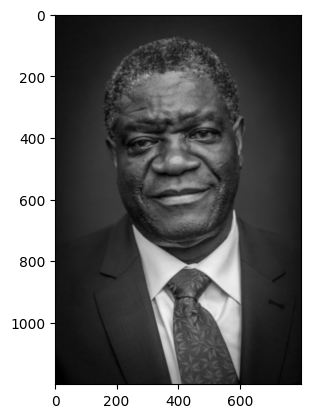

In [33]:
display_img(blurred3)

## 8. Apply median filter on image
* a) 3*3
* b) 5*5
* c) 7*7

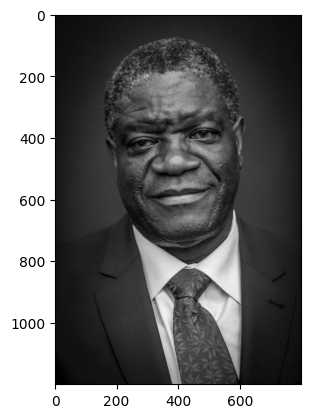

In [34]:
blurredMed1 = cv2.medianBlur(imGray2, 3)
display_img(blurredMed1)

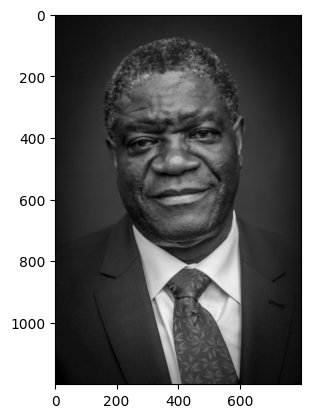

In [35]:
blurredMed2 = cv2.medianBlur(imGray2, 5)
display_img(blurredMed2)

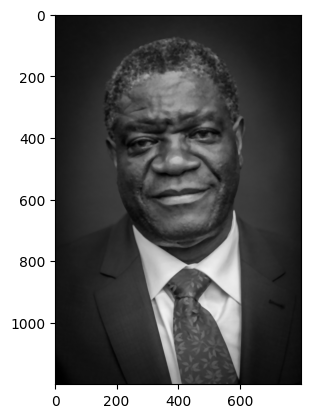

In [36]:
blurredMed3 = cv2.medianBlur(imGray2, 7)
display_img(blurredMed3)

## 9. Apply Box filter on image
* a) 3*3
* b) 5*5
* c) 7*7

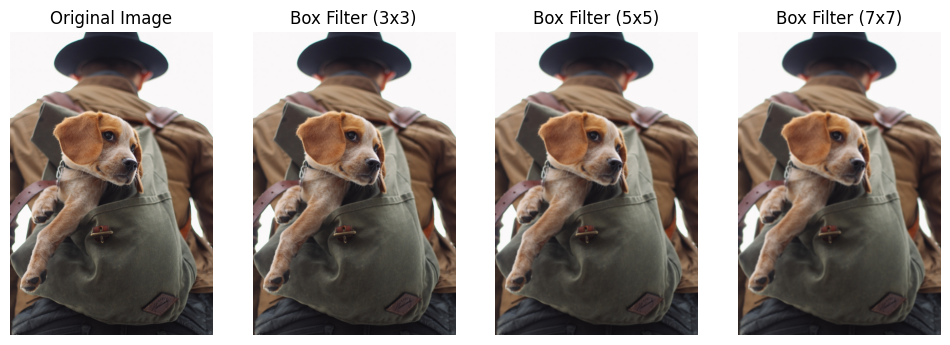

In [37]:
img = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Apply box filter with different kernel sizes
box_ksize3 = cv2.boxFilter(img, -1, (3, 3), normalize=True)
box_ksize5 = cv2.boxFilter(img, -1, (5, 5), normalize=True)
box_ksize7 = cv2.boxFilter(img, -1, (7, 7), normalize=True)

# Display images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(img)
axes[0].set_title("Original Image")

axes[1].imshow(box_ksize3)
axes[1].set_title("Box Filter (3x3)")

axes[2].imshow(box_ksize5)
axes[2].set_title("Box Filter (5x5)")

axes[3].imshow(box_ksize7)
axes[3].set_title("Box Filter (7x7)")

for ax in axes:
    ax.axis("off")

## 10. Apply Laplacian filter on image
* a) 3*3
* b) 5*5
* c) 7*7

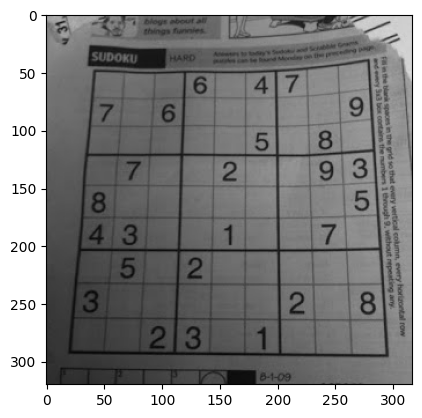

In [41]:
imGray3 = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
display_img(imGray3)

In [42]:
# Apply Laplacian filter with different kernel sizes
laplacian_ksize3 = cv2.Laplacian(imGray3, cv2.CV_64F, ksize=3)
laplacian_ksize5 = cv2.Laplacian(imGray3, cv2.CV_64F, ksize=5)
laplacian_ksize7 = cv2.Laplacian(imGray3, cv2.CV_64F, ksize=7)

# Convert results to uint8
laplacian_ksize1 = np.uint8(np.absolute(laplacian_ksize3))
laplacian_ksize3 = np.uint8(np.absolute(laplacian_ksize5))
laplacian_ksize5 = np.uint8(np.absolute(laplacian_ksize7))


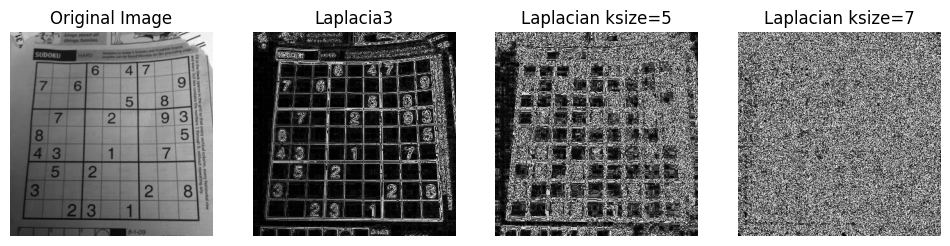

In [43]:
# Display images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(imGray3, cmap="gray")
axes[0].set_title("Original Image")
axes[1].imshow(laplacian_ksize1, cmap="gray")
axes[1].set_title("Laplacia3")
axes[2].imshow(laplacian_ksize3, cmap="gray")
axes[2].set_title("Laplacian ksize=5")
axes[3].imshow(laplacian_ksize5, cmap="gray")
axes[3].set_title("Laplacian ksize=7")

for ax in axes:
    ax.axis("off")

## 11. Apply sobel filter on image
* a) 3*3
* b) 5*5
* c) 7*7

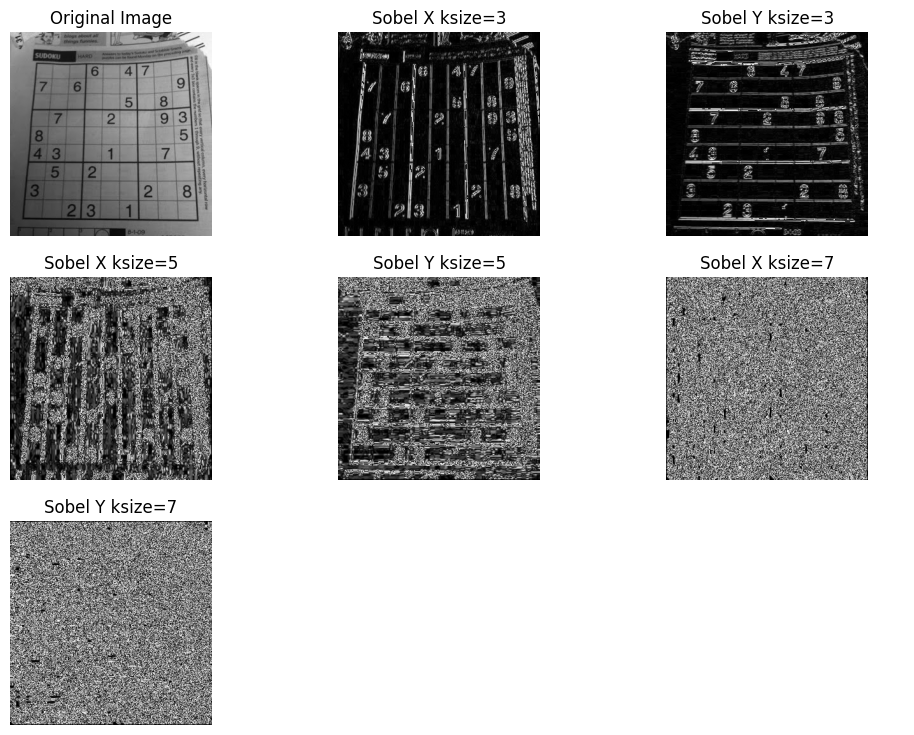

In [44]:
# Apply Sobel filter with different kernel sizes in X and Y directions
sobel_x_ksize3 = cv2.Sobel(imGray3, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_ksize3 = cv2.Sobel(imGray3, cv2.CV_64F, 0, 1, ksize=3)

sobel_x_ksize5 = cv2.Sobel(imGray3, cv2.CV_64F, 1, 0, ksize=5)
sobel_y_ksize5 = cv2.Sobel(imGray3, cv2.CV_64F, 0, 1, ksize=5)

sobel_x_ksize7 = cv2.Sobel(imGray3, cv2.CV_64F, 1, 0, ksize=7)
sobel_y_ksize7 = cv2.Sobel(imGray3, cv2.CV_64F, 0, 1, ksize=7)

# Convert results to uint8
sobel_x_ksize3 = np.uint8(np.absolute(sobel_x_ksize3))
sobel_y_ksize3 = np.uint8(np.absolute(sobel_y_ksize3))

sobel_x_ksize5 = np.uint8(np.absolute(sobel_x_ksize5))
sobel_y_ksize5 = np.uint8(np.absolute(sobel_y_ksize5))

sobel_x_ksize7 = np.uint8(np.absolute(sobel_x_ksize7))
sobel_y_ksize7 = np.uint8(np.absolute(sobel_y_ksize7))

# Display images
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

axes[0, 0].imshow(imGray3, cmap="gray")
axes[0, 0].set_title("Original Image")

axes[0, 1].imshow(sobel_x_ksize3, cmap="gray")
axes[0, 1].set_title("Sobel X ksize=3")

axes[0, 2].imshow(sobel_y_ksize3, cmap="gray")
axes[0, 2].set_title("Sobel Y ksize=3")

axes[1, 0].imshow(sobel_x_ksize5, cmap="gray")
axes[1, 0].set_title("Sobel X ksize=5")

axes[1, 1].imshow(sobel_y_ksize5, cmap="gray")
axes[1, 1].set_title("Sobel Y ksize=5")

axes[1, 2].imshow(sobel_x_ksize7, cmap="gray")
axes[1, 2].set_title("Sobel X ksize=7")

axes[2, 0].imshow(sobel_y_ksize7, cmap="gray")
axes[2, 0].set_title("Sobel Y ksize=7")

for ax in axes.flatten():
    ax.axis("off")


## 12. Apply thresholding on image
* a) Simple thresholding
* b) Adaptive thresholding

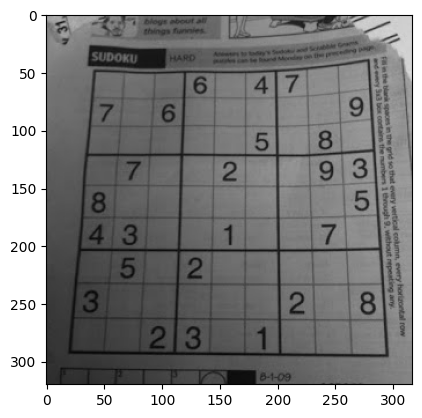

In [45]:
imGray3 = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
display_img(imGray3)

**Simple thresholding**

We must specify a threshold value T. All pixel
intensities below T are set to 0. And all pixel intensities
greater than T are set to 255.


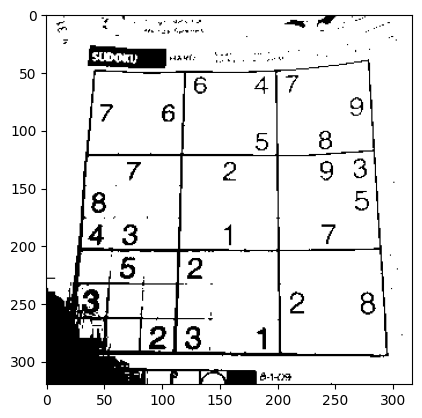

In [46]:
(T, thresh) = cv2.threshold(imGray3, 60, 255, cv2.THRESH_BINARY)
display_img(thresh)

**Adaptive Thresholding**

* We then apply adaptive thresholding to our blurred image using the cv2.adaptiveThreshold function on .
* The first parameter we supply is the image we want to
threshold. Then, we supply our maximum value of 255,
similar to simple thresholding mentioned above.
* The third argument is our method to compute the threshold for the current neighborhood of pixels. By supplying
cv2.ADAPTIVE_THRESH_MEAN_C, we indicate that we want to
compute the mean of the neighborhood of pixels and treat
126
9.2 adaptive thresholding
it as our T value.
* Next, we need our thresholding method. Again, the description of this parameter is identical to the simple thresholding method mentioned above. We use cv2.THRESH_BINAR
Y_INV to indicate that any pixel intensity greater than T in
the neighborhood should be set to 255, otherwise it should
be set to 0.
* The next parameter is our neighborhood size. This integer value must be odd and indicates how large our neighborhood of pixels is going to be. We supply a value of 11,
indicating that we are going to examine 11 × 11 pixel regions of the image, instead of trying to threshold the image
globally, as in simple thresholding methods.
Finally, we supply a parameter simply called C. This
value is an integer that is subtracted from the mean, allowing us to fine-tune our thresholding. We use C = 4 in this
example.


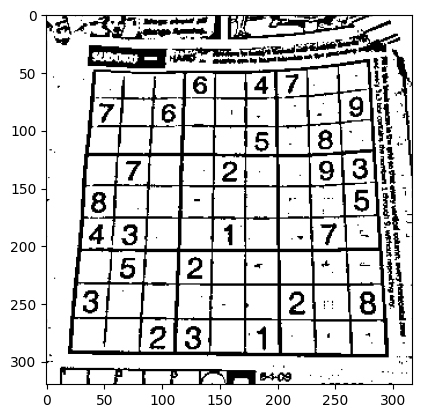

In [47]:
threshAdap = cv2.adaptiveThreshold(imGray3, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 4)
display_img(threshAdap)

## 13. Apply canny edge detection on image

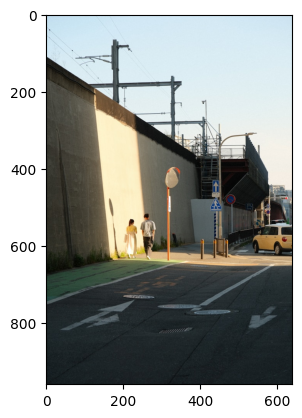

In [50]:
imBuilding = cv2.imread('sunny-young.jpg', cv2.IMREAD_COLOR)
display_img(imBuilding)

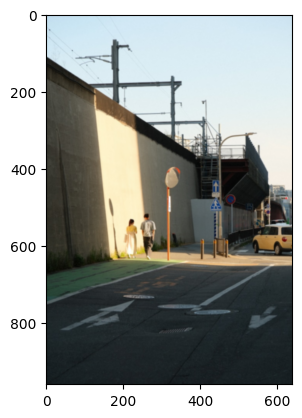

In [51]:
buildingBlurr = cv2.GaussianBlur(imBuilding, (5, 5), 0)
display_img(buildingBlurr)

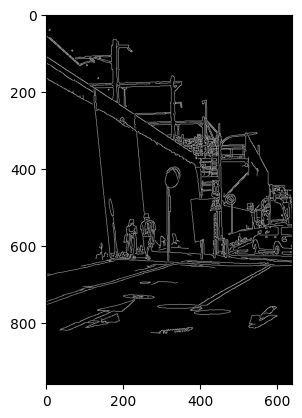

In [52]:
canny = cv2.Canny(buildingBlurr, 30, 120)
display_img(canny)

## 14. Apply harris edge detection on image

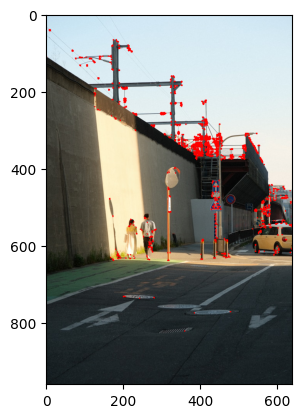

In [53]:
imBuilding = cv2.imread('sunny-young.jpg', cv2.IMREAD_COLOR)

gray = cv2.cvtColor(imBuilding, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)


harris_dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)


harris_dst = cv2.dilate(harris_dst, None)

imBuilding_harris = imBuilding.copy()
imBuilding_harris[harris_dst > 0.01 * harris_dst.max()] = [0, 0, 255]

display_img(imBuilding_harris)